# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [39]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (7) Failed to connect to archive.ics.uci.edu port 80 after 94 ms: Couldn't connect to server


In [18]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [56]:
!gunzip SUSY.csv.gz

In [22]:
ls

Calderon_Lab_Parts.1-4.7-Copy1.ipynb  Untitled.ipynb    sdsmlmslmlsmdsl.ipynb
Calderon_Lab_Parts.1-4.7.ipynb        myenv/            workspace/
SUSY-small.csv                        python3-jupyter/
SUSY.csv.gz                           python3-numpy/


In [57]:
ls -lh

total 2.3G
-rw-r--r-- 1 caldepao caldepao  50K Mar 31 15:07 Calderon_Lab_Parts.1-4.7-Copy1.ipynb
-rw-r--r-- 1 caldepao caldepao  47K Mar 31 15:08 Calderon_Lab_Parts.1-4.7.ipynb
-rw-r--r-- 1 caldepao caldepao    0 Mar 31 15:20 SUSY-small.csv
-rw-r--r-- 1 caldepao caldepao 2.3G Mar 31 15:32 SUSY.csv
-rw-r--r-- 1 caldepao caldepao  581 Mar 31 14:53 Untitled.ipynb
drwxr-xr-x 7 caldepao caldepao 4.0K Mar 31 15:19 myenv/
drwxr-xr-x 2 caldepao caldepao 4.0K Jan 22 10:06 python3-jupyter/
drwxr-xr-x 2 caldepao caldepao 4.0K Jan 22 10:05 python3-numpy/
-rw-r--r-- 1 caldepao caldepao 269K Mar 31 15:26 sdsmlmslmlsmdsl.ipynb
drwxr-xr-x 3 caldepao caldepao 4.0K Jan 22 13:04 workspace/


In [58]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [59]:
!ls -lh

total 2.3G
-rw-r--r-- 1 caldepao caldepao  50K Mar 31 15:07 Calderon_Lab_Parts.1-4.7-Copy1.ipynb
-rw-r--r-- 1 caldepao caldepao  47K Mar 31 15:08 Calderon_Lab_Parts.1-4.7.ipynb
-rw-r--r-- 1 caldepao caldepao    0 Mar 31 15:20 SUSY-small.csv
-rw-r--r-- 1 caldepao caldepao 2.3G Mar 31 15:32 SUSY.csv
-rw-r--r-- 1 caldepao caldepao  581 Mar 31 14:53 Untitled.ipynb
drwxr-xr-x 7 caldepao caldepao 4.0K Mar 31 15:19 myenv
drwxr-xr-x 2 caldepao caldepao 4.0K Jan 22 10:06 python3-jupyter
drwxr-xr-x 2 caldepao caldepao 4.0K Jan 22 10:05 python3-numpy
-rw-r--r-- 1 caldepao caldepao 269K Mar 31 15:26 sdsmlmslmlsmdsl.ipynb
drwxr-xr-x 3 caldepao caldepao 4.0K Jan 22 13:04 workspace


We see that we have 5 million datapoints.

In [60]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [61]:
!head -500000 SUSY.csv > SUSY-small.csv

In [62]:
ls -lh

total 2.5G
-rw-r--r-- 1 caldepao caldepao  50K Mar 31 15:07 Calderon_Lab_Parts.1-4.7-Copy1.ipynb
-rw-r--r-- 1 caldepao caldepao  47K Mar 31 15:08 Calderon_Lab_Parts.1-4.7.ipynb
-rw-r--r-- 1 caldepao caldepao 228M Mar 31 15:34 SUSY-small.csv
-rw-r--r-- 1 caldepao caldepao 2.3G Mar 31 15:32 SUSY.csv
-rw-r--r-- 1 caldepao caldepao  581 Mar 31 14:53 Untitled.ipynb
drwxr-xr-x 7 caldepao caldepao 4.0K Mar 31 15:19 myenv/
drwxr-xr-x 2 caldepao caldepao 4.0K Jan 22 10:06 python3-jupyter/
drwxr-xr-x 2 caldepao caldepao 4.0K Jan 22 10:05 python3-numpy/
-rw-r--r-- 1 caldepao caldepao 269K Mar 31 15:26 sdsmlmslmlsmdsl.ipynb
drwxr-xr-x 3 caldepao caldepao 4.0K Jan 22 13:04 workspace/


In [63]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [64]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [65]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [66]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [67]:
FeatureNames

['M_Delta_R',
 'M_TR_2',
 'cos_theta_r1',
 'M_R',
 'MT2',
 'dPhi_r_b',
 'S_R',
 'R',
 'MET_rel',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [69]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [70]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [71]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


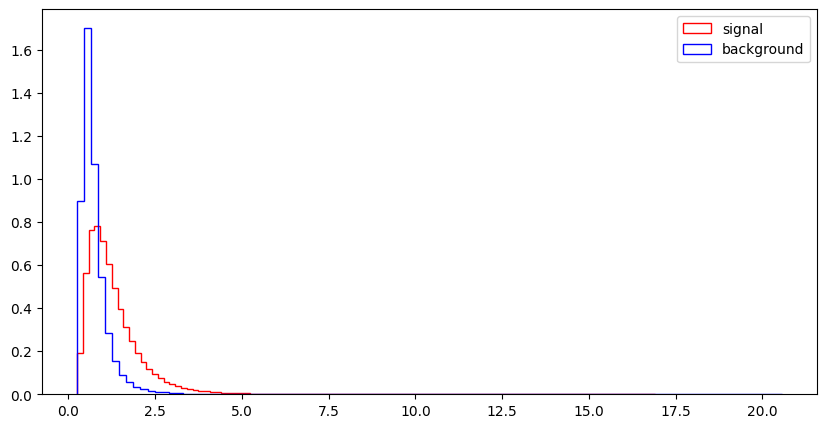

l_1_eta


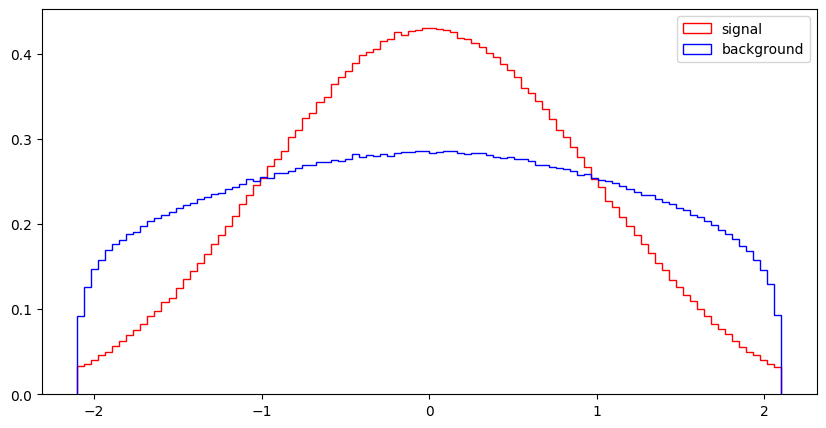

l_1_phi


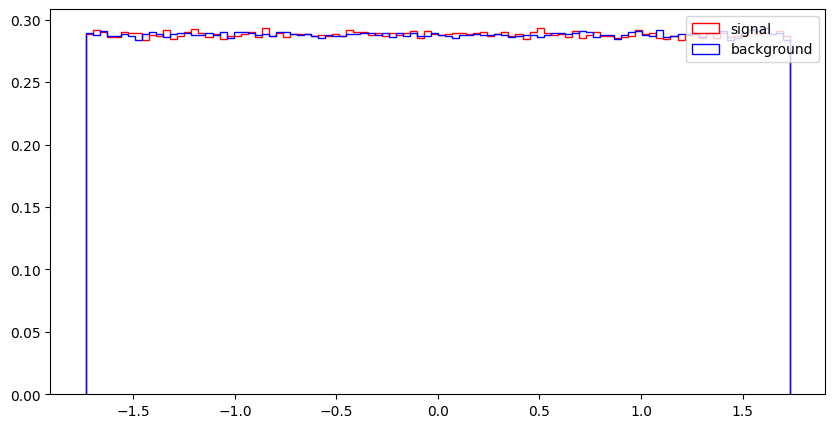

l_2_pT


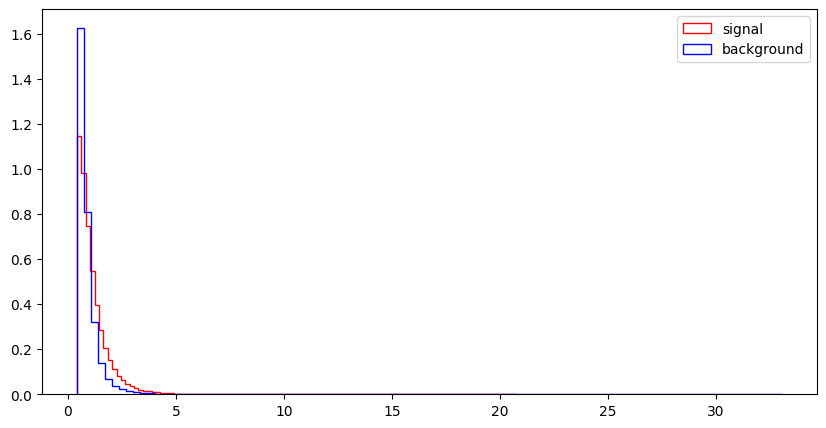

l_2_eta


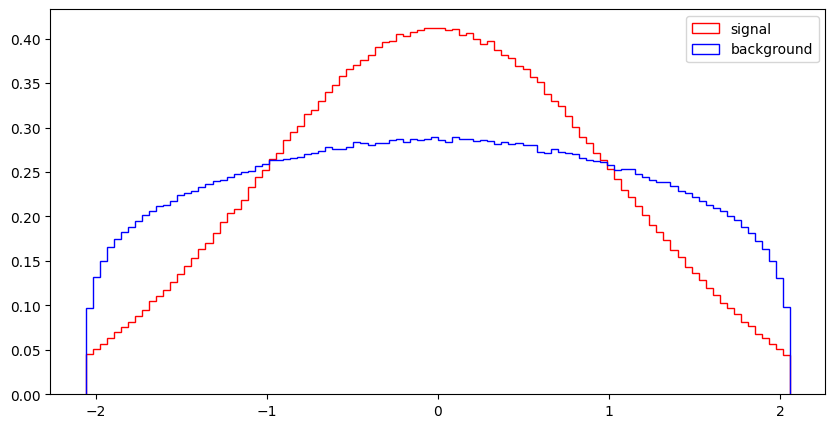

l_2_phi


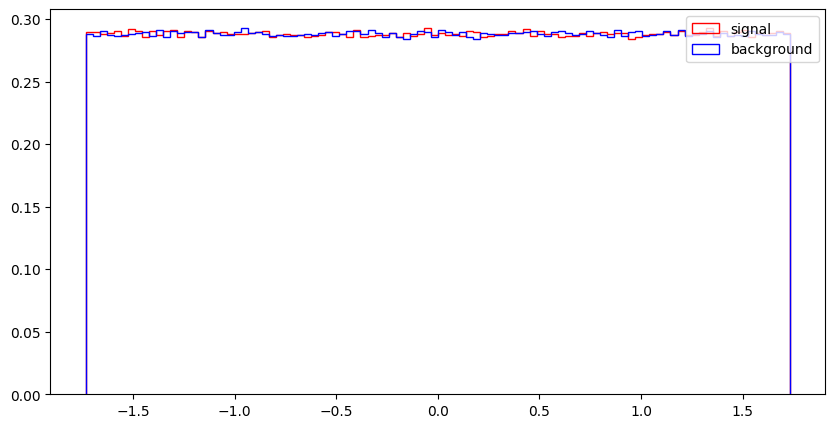

MET


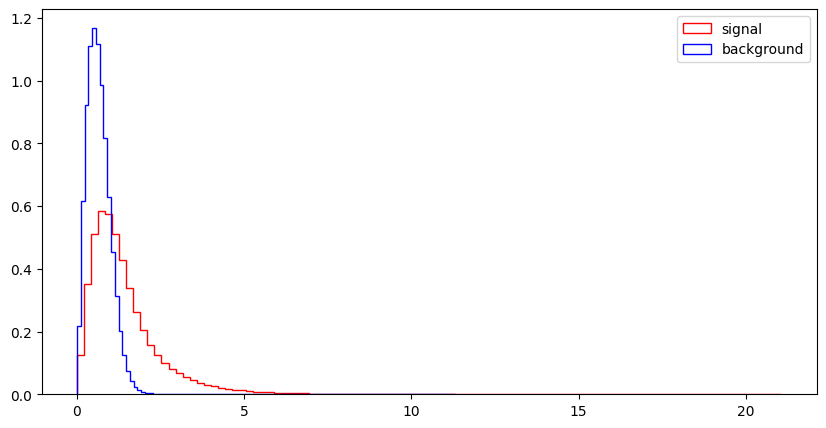

MET_phi


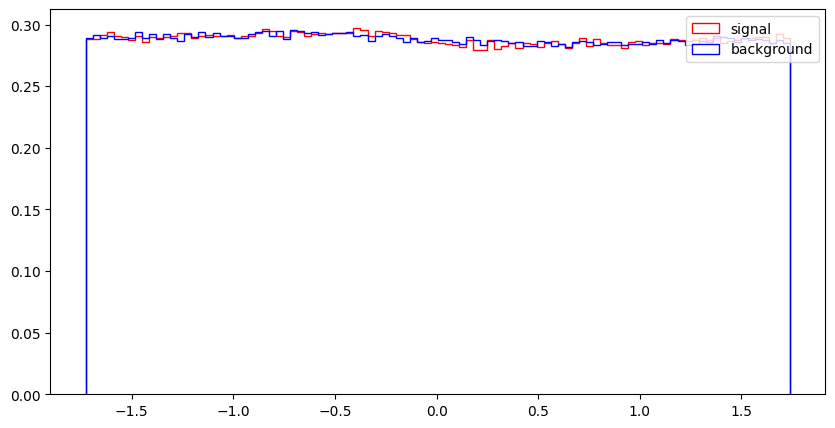

MET_rel


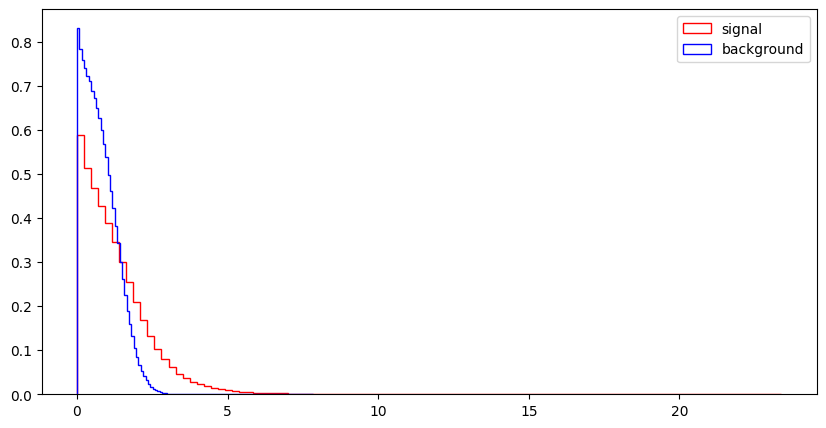

axial_MET


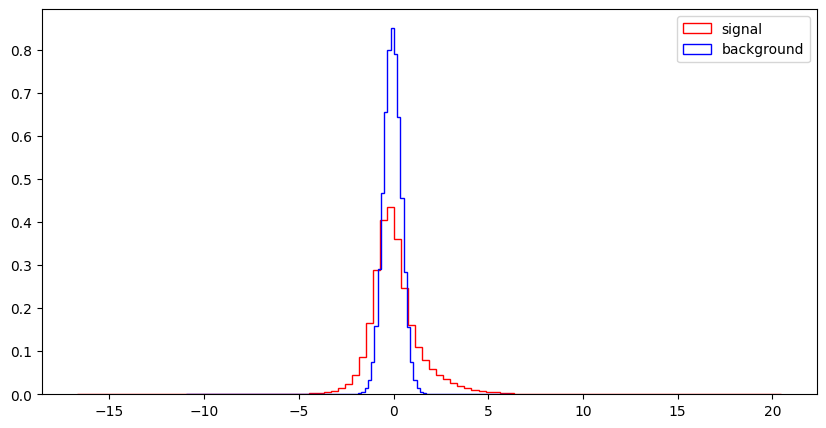

M_R


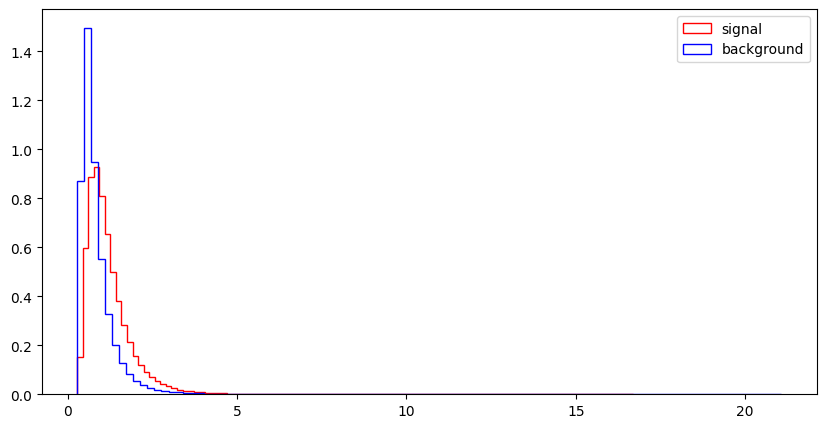

M_TR_2


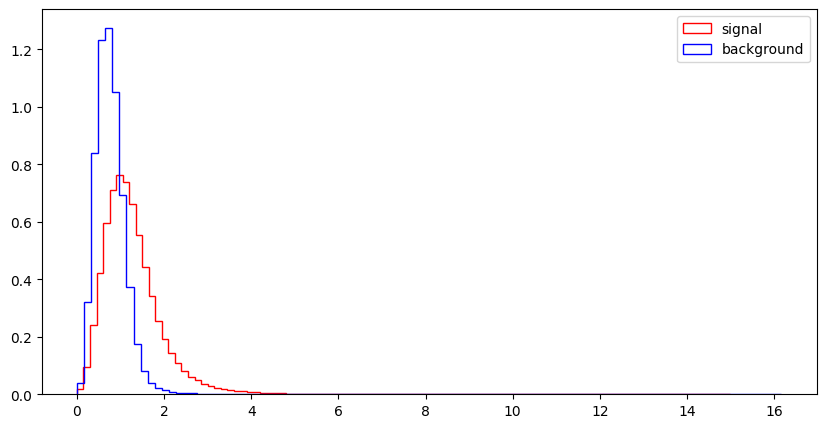

R


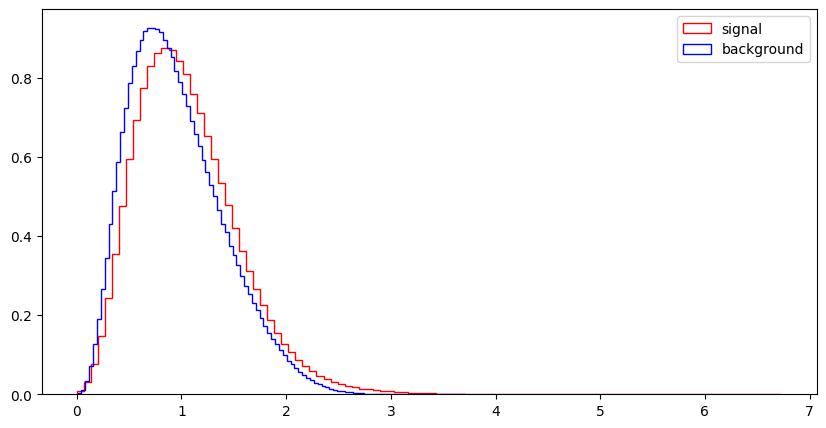

MT2


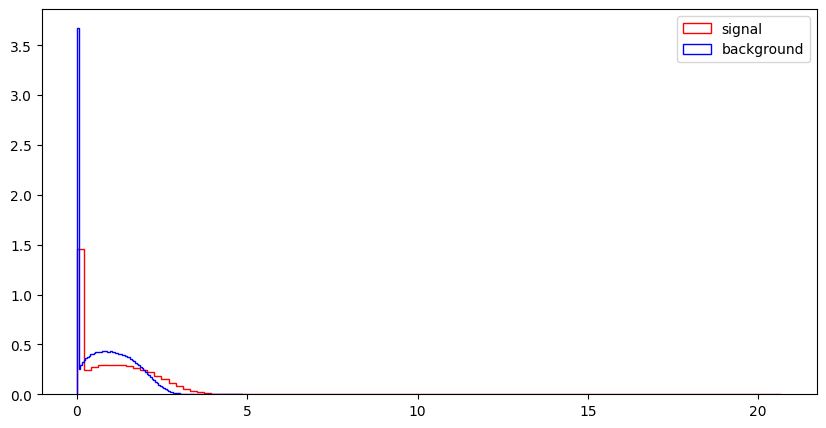

S_R


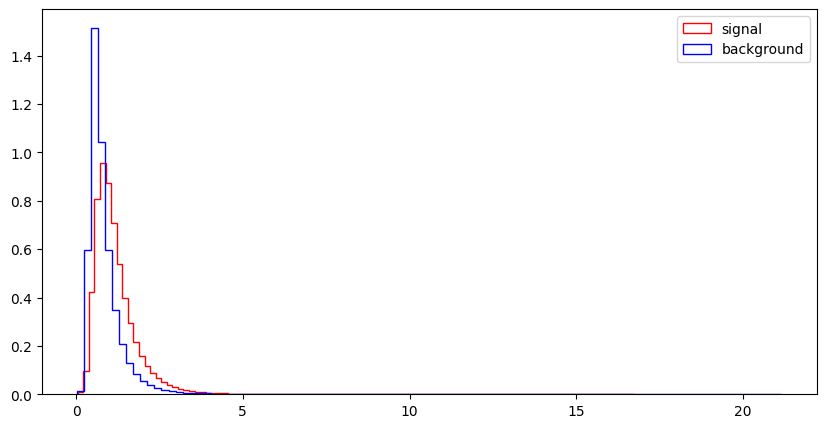

M_Delta_R


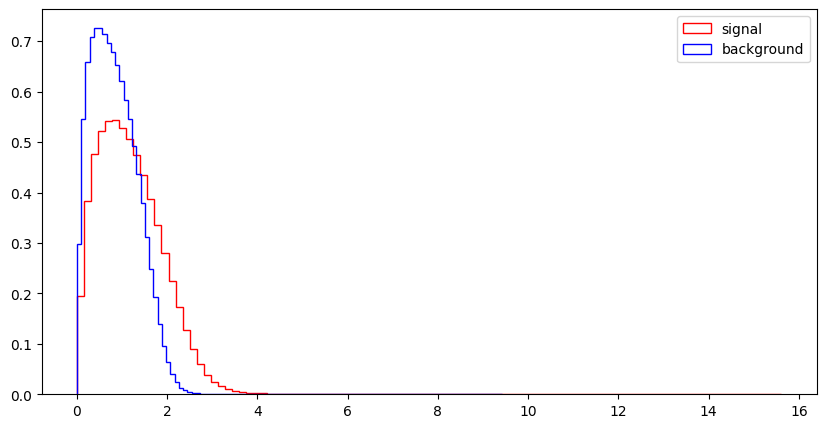

dPhi_r_b


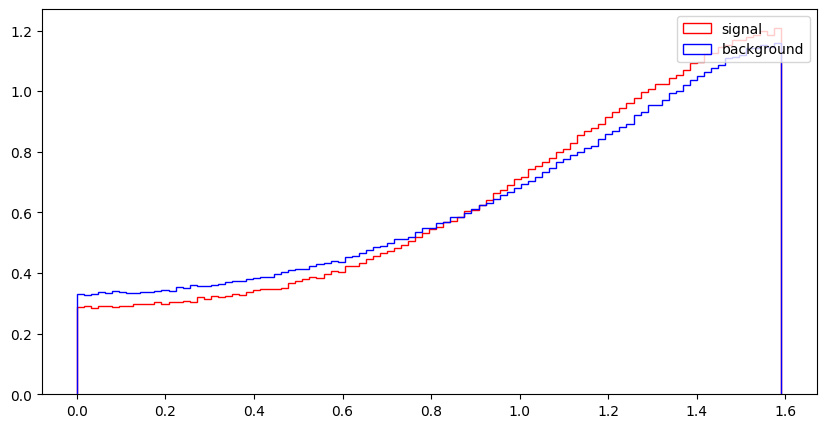

cos_theta_r1


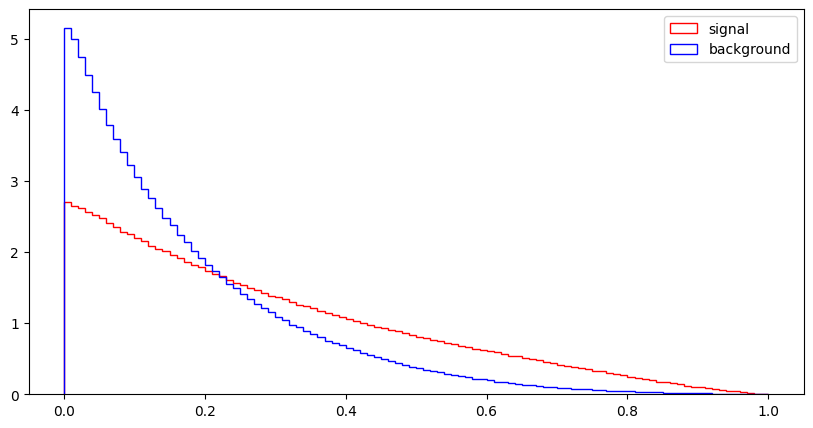

In [72]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

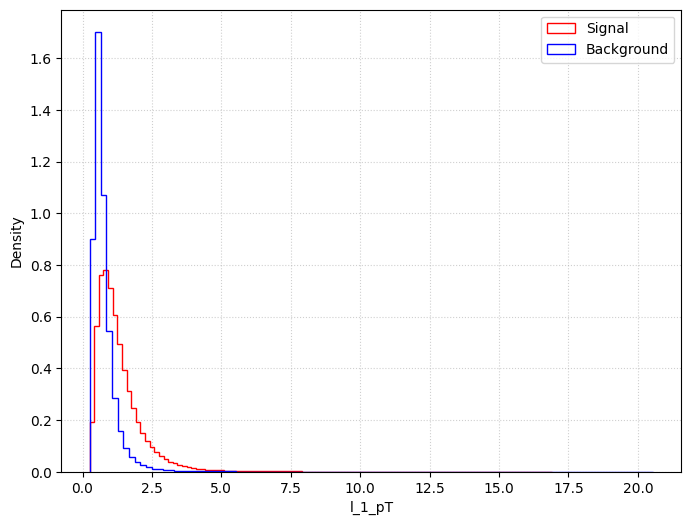

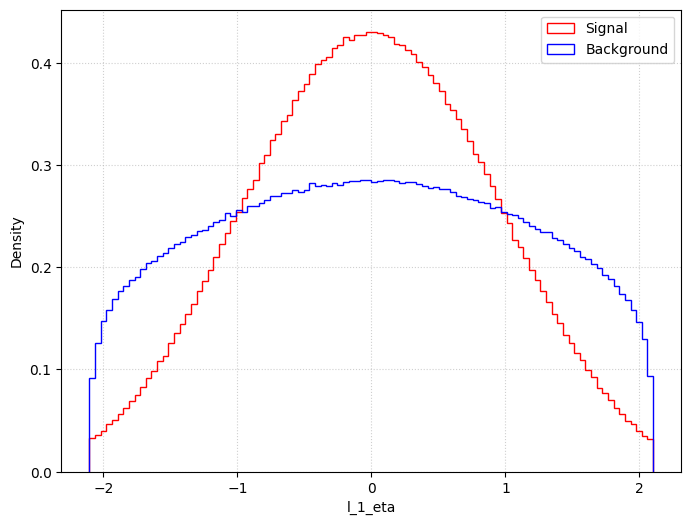

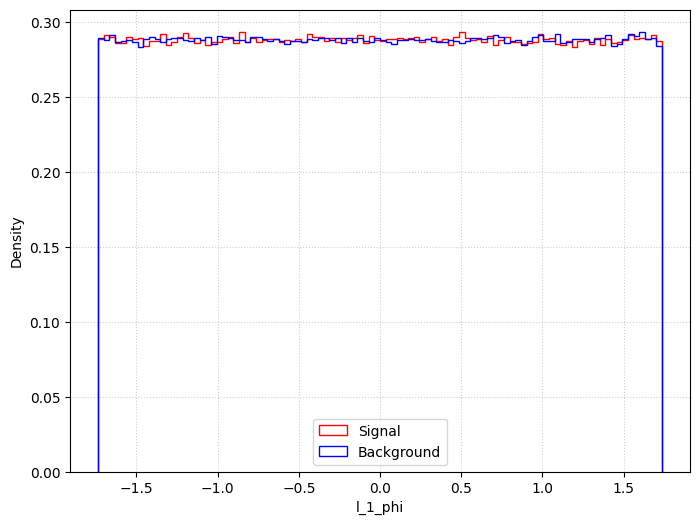

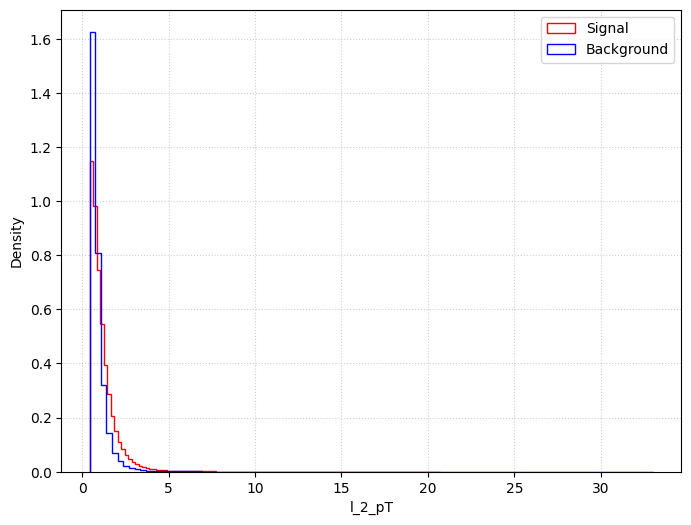

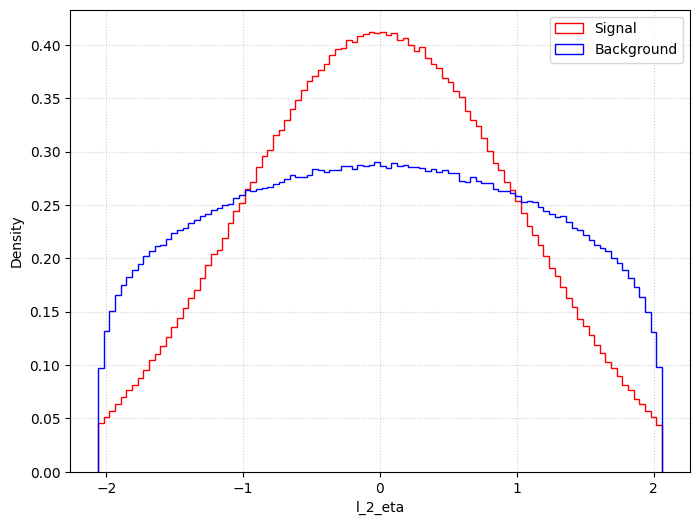

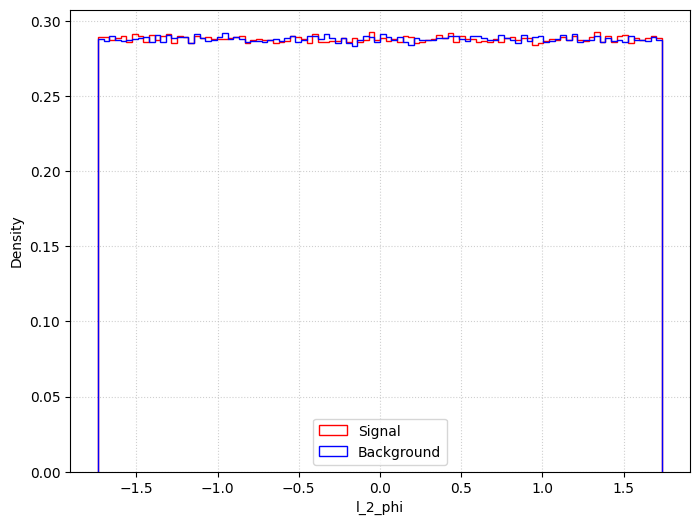

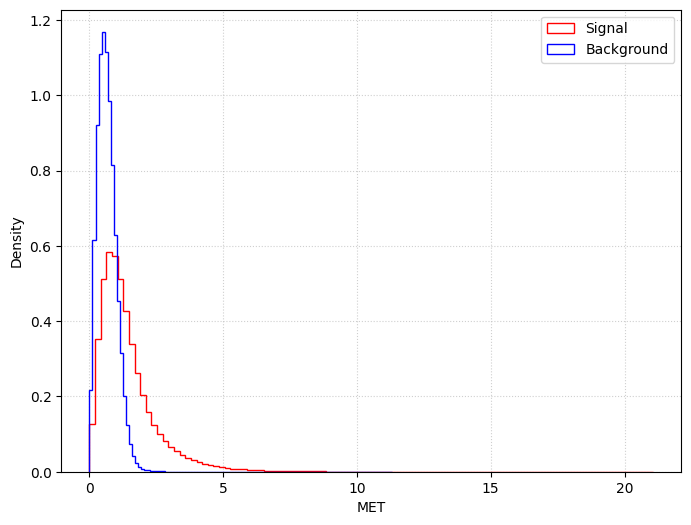

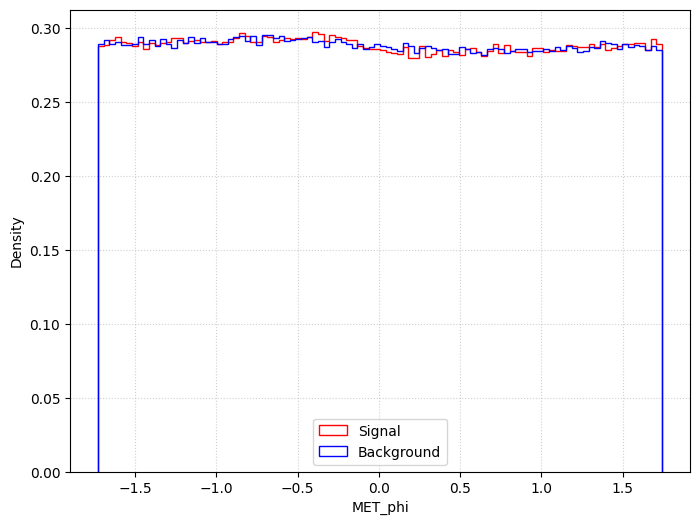

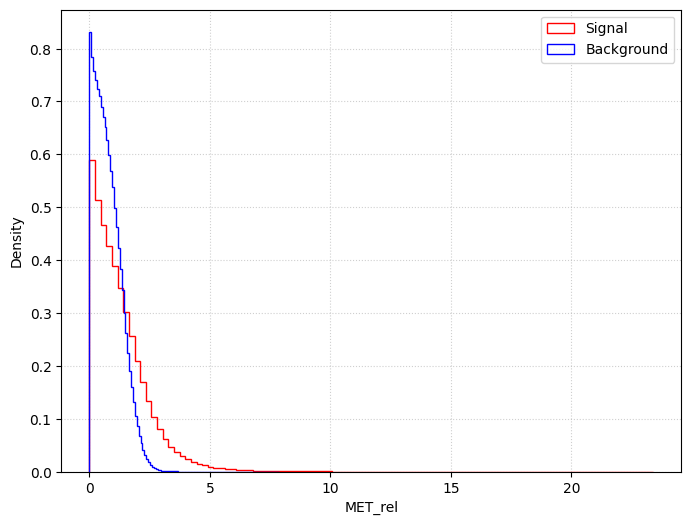

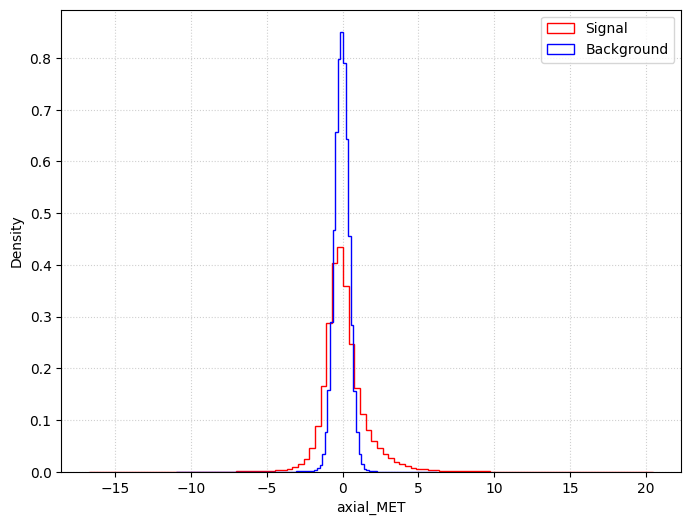

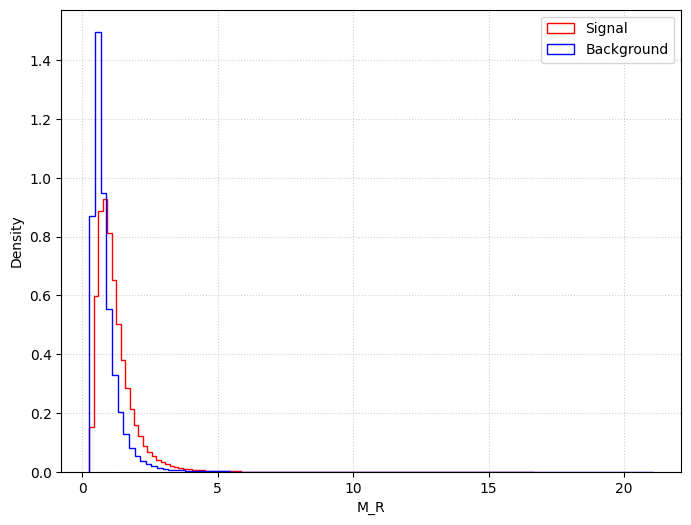

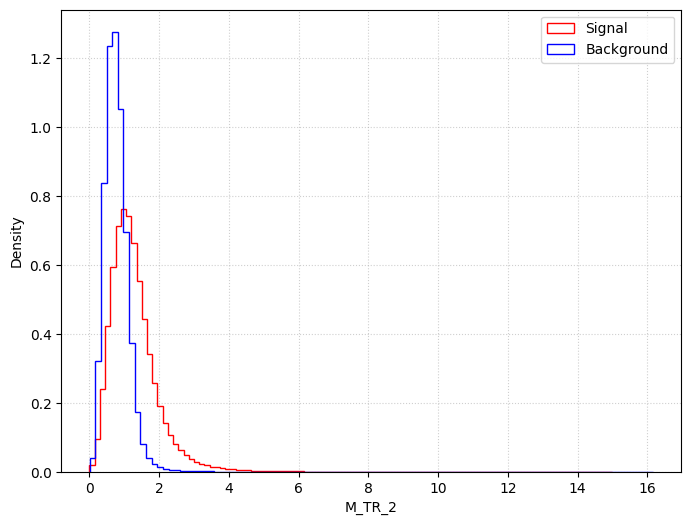

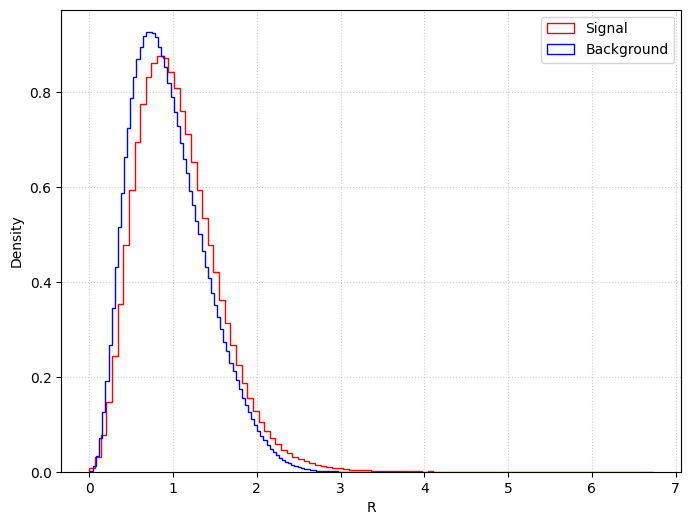

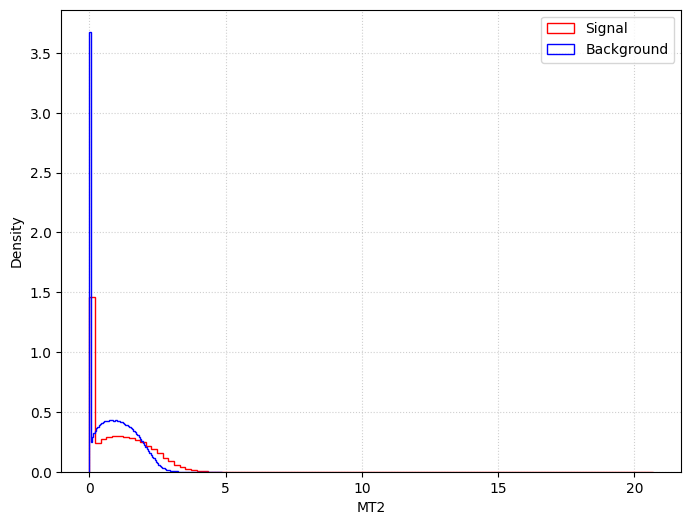

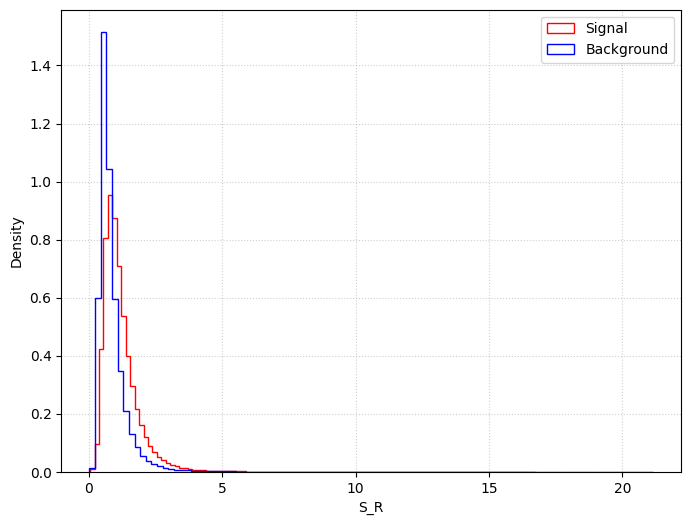

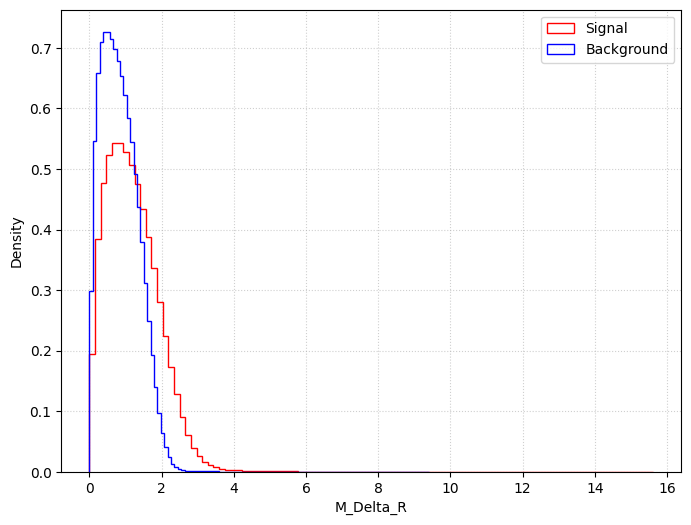

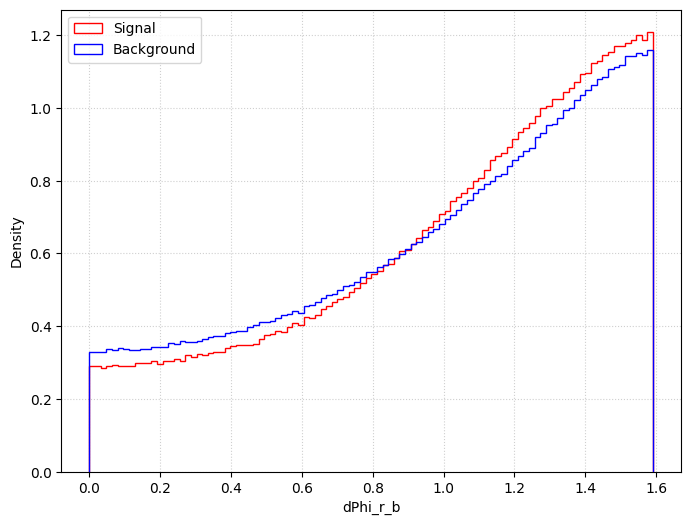

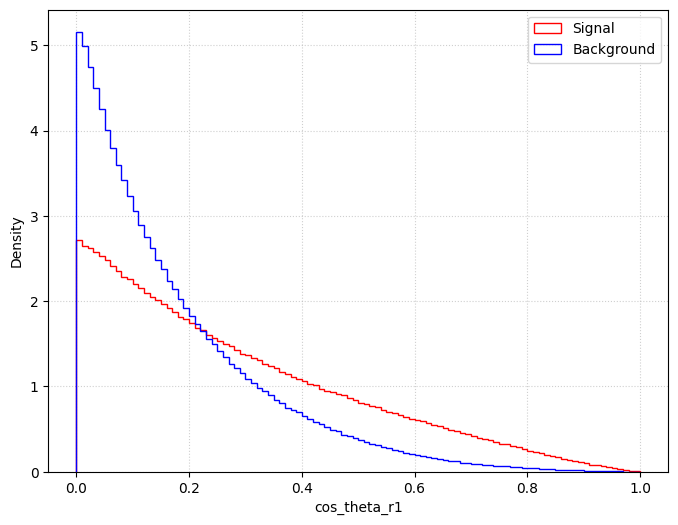

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through each feature variable, creating individual histograms
for feature in VarNames[1:]:
    fig, ax = plt.subplots(figsize=(8, 6))  # Set up figure and axis

    # Plot histogram for the signal data
    ax.hist(df_sig[feature].values, bins=100, histtype='step', color='red', label='Signal', density=True)

    # Plot histogram for the background data
    ax.hist(df_bkg[feature].values, bins=100, histtype='step', color='blue', label='Background', density=True)

    # Customize axis labels, legend, and grid
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend(loc='best')
    ax.grid(which='both', linestyle=':', alpha=0.6)

    plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [74]:
## Part (a)

def create_pairwise_plots(susy_data, higgs_data, features, filter_conditions, low_features=True):
    # Define title based on feature level
    plot_title = 'Pairwise Plots - Low-Level Features' if low_features else 'Pairwise Plots - High-Level Features'

    # Initialize the figure
    fig = plt.figure(figsize=(15, 15))
    total_features = len(features)

    # Loop through pairs of features to plot
    for idx_x, var_x in enumerate(features):
        for idx_y, var_y in enumerate(features):
            plt.subplot(total_features, total_features, idx_x * total_features + idx_y + 1)
            show_legend = (idx_x == 0) and (idx_y == 0)
            draw_plot(susy_data, var_x, var_y, filter_conditions, 'SUSY Data', show_legend)
            draw_plot(higgs_data, var_x, var_y, filter_conditions, 'Higgs Data', False)

    fig.suptitle(plot_title, fontsize=16)
    plt.tight_layout()
    plt.show()

def draw_plot(dataframe, x_feature, y_feature, conditions, plot_label, show_legend):
    data_selection = dataframe.query(conditions)
    if x_feature == y_feature:
        plt.hist(data_selection[x_feature], alpha=0.5, bins=50, density=True, label=plot_label if show_legend else None)
    else:
        plt.scatter(data_selection[x_feature], data_selection[y_feature], label=plot_label if show_legend else None)
    if show_legend:
        plt.legend()

In [75]:
## Part (b)

def create_optimized_pairwise_plots(susy_data, higgs_data, features, filter_conditions, low_features=True):
    # Title based on feature level
    plot_title = 'Pairwise Plots - Low-Level Features' if low_features else 'Pairwise Plots - High-Level Features'

    plt.figure(figsize=(15, 15))
    num_features = len(features)

    # Precompute histograms for SUSY and Higgs data
    susy_hist_data = {f: np.histogram(susy_data.query(filter_conditions)[f], bins=50, density=True) for f in features}
    higgs_hist_data = {f: np.histogram(higgs_data.query(filter_conditions)[f], bins=50, density=True) for f in features}

    # Loop through feature pairs
    for x_idx, x_feature in enumerate(features):
        for y_idx, y_feature in enumerate(features):
            plt.subplot(num_features, num_features, x_idx * num_features + y_idx + 1)
            show_legend = (x_idx == 0) and (y_idx == 0)

            # Use cached histograms for faster plotting
            plot_precomputed_histogram(susy_hist_data[x_feature], 'SUSY', show_legend)
            plot_precomputed_histogram(higgs_hist_data[x_feature], 'Higgs', False)

    plt.suptitle(plot_title, fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_precomputed_histogram(hist_data, label, show_legend):
    plt.fill_between(hist_data[1][:-1], hist_data[0], alpha=0.5, label=label if show_legend else None, color='green')
    if show_legend:
        plt.legend()

In [76]:
## Part (c)

## When identifying the best observables, look for variables that show distinct clusters or peaks between the SUSY and Higgs datasets.
## Features where distributions for SUSY and Higgs data are visibly separate or differ significantly in shape or peak height
## may provide the best separation.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [77]:
## Part (a)

from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [78]:
import numpy as np
from tabulate import tabulate

## function to calculate covariance and correlation matrices
def calculate_matrices(data_frame):
    cov_matrix = np.cov(data_frame, rowvar=False)
    corr_matrix = np.corrcoef(data_frame, rowvar=False)
    return cov_matrix, corr_matrix

## function to format the matrix values
def matrix_to_strings(matrix):
    return [["{:.3f}".format(elem) for elem in row] for row in matrix]

## function to generate tables with tabulate
def present_matrix(matrix, column_labels):
    formatted_matrix = matrix_to_strings(matrix)
    table = tabulate(formatted_matrix, headers=column_labels, tablefmt="grid")
    print(table)

## function to process and present dataset analyses
def dataset_analysis(data, column_names=None):
    # Set default column names if not provided
    if column_names is None:
        column_names = [f"Feature {idx+1}" for idx in range(data.shape[1])]

    ## separate low and high-level features
    low_features = data[:, :5]
    high_features = data[:, 5:]

    ## compute matrices for low-level features
    cov_low, corr_low = calculate_matrices(low_features)
    print("Low-Level Features Covariance and Correlation:")
    present_matrix(cov_low, column_names[:5])
    present_matrix(corr_low, column_names[:5])

    ## compute matrices for high-level features
    cov_high, corr_high = calculate_matrices(high_features)
    print("\nHigh-Level Features Covariance and Correlation:")
    present_matrix(cov_high, column_names[5:])
    present_matrix(corr_high, column_names[5:])

In [79]:
## test
dataset = np.random.rand(100, 10)  # generate a dataset with 100 samples and 10 features
dataset_analysis(dataset)  # use the modified function for analysis

Low-Level Features Covariance and Correlation:
+-------------+-------------+-------------+-------------+-------------+
|   Feature 1 |   Feature 2 |   Feature 3 |   Feature 4 |   Feature 5 |
+=============+=============+=============+=============+=============+
|       0.083 |       0     |      -0.002 |       0.006 |       0.002 |
+-------------+-------------+-------------+-------------+-------------+
|       0     |       0.082 |       0.002 |      -0.003 |       0.006 |
+-------------+-------------+-------------+-------------+-------------+
|      -0.002 |       0.002 |       0.091 |      -0.004 |      -0.001 |
+-------------+-------------+-------------+-------------+-------------+
|       0.006 |      -0.003 |      -0.004 |       0.081 |       0.001 |
+-------------+-------------+-------------+-------------+-------------+
|       0.002 |       0.006 |      -0.001 |       0.001 |       0.082 |
+-------------+-------------+-------------+-------------+-------------+
+-------------+--

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

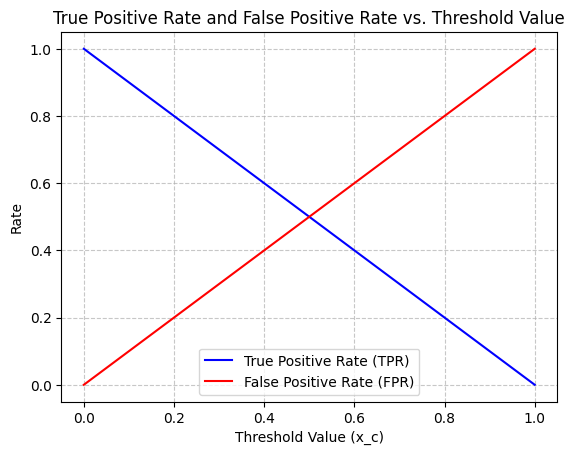

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the expected number of signal and background events
expected_signal = 1000
expected_background = 10000

# Define an array of possible threshold values
xc_values = np.linspace(0, 1, 100)  # Can be adjusted for finer granularity

# Calculate TPR and FPR as functions of the threshold values
tpr_vals = [1 - xc for xc in xc_values]  # TPR decreases as threshold increases
fpr_vals = [xc for xc in xc_values]      # FPR increases as threshold increases

# Plot TPR and FPR against threshold values
plt.plot(xc_values, tpr_vals, label='True Positive Rate (TPR)', color='blue')
plt.plot(xc_values, fpr_vals, label='False Positive Rate (FPR)', color='red')
plt.xlabel('Threshold Value (x_c)')
plt.ylabel('Rate')
plt.title('True Positive Rate and False Positive Rate vs. Threshold Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




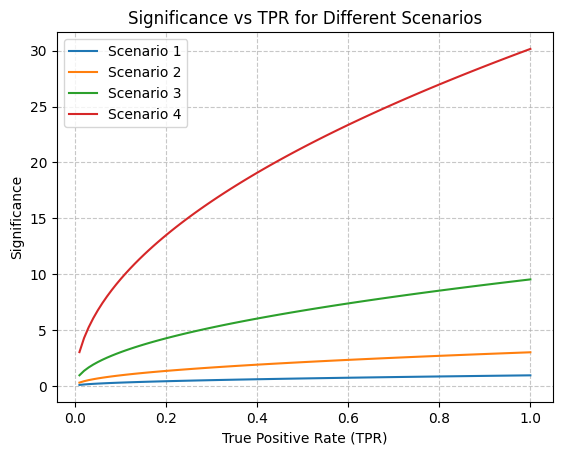

Scenario,Initial Signal,Initial Background,Optimal TPR,Optimal FPR,Signal After Cut,Background After Cut,Max Significance
Scenario 1,10,100,1,1,10,100,0.953463
Scenario 2,100,1000,1,1,100,1000,3.01511
Scenario 3,1000,10000,1,1,1000,10000,9.53463
Scenario 4,10000,100000,1,1,10000,100000,30.1511


In [81]:
from IPython.display import display
from tabulate import tabulate

def calculate_significance_cutflow(scenarios, log_scale=False):
    # Dictionary to store maximum significance details
    max_significances = {}
    results_table = []

    for scenario_name, (expected_signal, expected_background) in scenarios.items():
        # Generate TPR and FPR arrays
        TPR_array = np.linspace(0, 1, 100)
        FPR_array = np.linspace(0, 1, 100)

        # Calculate expected signal and background counts after cuts
        signal_counts_cut = expected_signal * TPR_array
        background_counts_cut = expected_background * FPR_array

        # Calculate significance, handling potential NaNs from divide-by-zero
        with np.errstate(divide='ignore', invalid='ignore'):
            significance = np.divide(signal_counts_cut, np.sqrt(signal_counts_cut + background_counts_cut))

        # Plot significance for each scenario
        plt.plot(TPR_array, significance, label=scenario_name)

        # Find the index with maximum significance
        max_index = np.nanargmax(significance)
        max_significances[scenario_name] = {
            "max_TPR": TPR_array[max_index],
            "max_FPR": FPR_array[max_index],
            "max_signal_cut": signal_counts_cut[max_index],
            "max_background_cut": background_counts_cut[max_index],
            "max_significance": significance[max_index]
        }

        # Append the results for the table display
        results_table.append([
            scenario_name, expected_signal, expected_background,
            TPR_array[max_index], FPR_array[max_index],
            signal_counts_cut[max_index], background_counts_cut[max_index],
            significance[max_index]
        ])
        
    # Plot the significance
    if log_scale:
        plt.yscale("log")
    plt.xlabel("True Positive Rate (TPR)")
    plt.ylabel("Significance")
    plt.legend()
    plt.title("Significance vs TPR for Different Scenarios")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Display results in a tabulated format
    headers = ["Scenario", "Initial Signal", "Initial Background", "Optimal TPR", "Optimal FPR",
               "Signal After Cut", "Background After Cut", "Max Significance"]
    display(tabulate(results_table, headers=headers, tablefmt='html'))

    return max_significances

# Define specific scenarios
cutflow_scenarios = {
    "Scenario 1": (10, 100),
    "Scenario 2": (100, 1000),
    "Scenario 3": (1000, 10000),
    "Scenario 4": (10000, 100000)
}

# Calculate and display significance cutflows
max_significance_results = calculate_significance_cutflow(cutflow_scenarios)

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



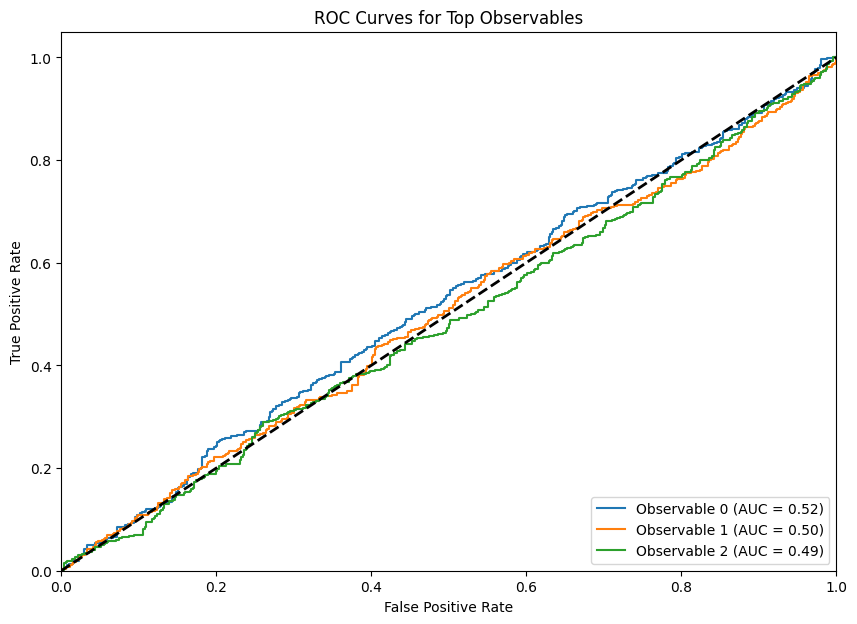

In [82]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(observables, data, labels, title="ROC Curves for Top Observables"):
    plt.figure(figsize=(10, 7))
    auc_values = {}

    for obs in observables:
        # Get scores for the observable
        scores = data[:, obs]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(labels, scores)
        roc_auc = auc(fpr, tpr)
        auc_values[obs] = roc_auc

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'Observable {obs} (AUC = {roc_auc:.2f})')

    # Plotting details
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    return auc_values

# Example usage:
# Assuming `data` is your dataset (1000 samples, 10 observables) and `labels` contains binary labels for each sample.
data = np.random.rand(1000, 10)  # Random data for demonstration
labels = np.random.randint(0, 2, 1000)  # Random binary labels

# Define observables you want to analyze (top 3 indices as an example)
observables_to_analyze = [0, 1, 2]

# Plot ROC curves and get AUC values
auc_results = plot_roc_curves(observables_to_analyze, data, labels)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [83]:
df_sig.shape

(2287827, 19)

In [84]:
df_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,1.0,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,1.0,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.0,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [85]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [86]:
m_s= np.mean(df_sig_0,axis=0)
m_s

l_1_pT          1.290233
l_1_eta        -0.000336
l_1_phi        -0.000553
l_2_pT          1.138185
l_2_eta         0.000378
l_2_phi        -0.000128
MET             1.417029
MET_phi         0.000155
MET_rel         1.275509
axial_MET       0.084007
M_R             1.182889
M_TR_2          1.268996
R               1.057301
MT2             1.074723
S_R             1.174697
M_Delta_R       1.185596
dPhi_r_b        1.014991
cos_theta_r1    0.282560
dtype: float64

In [87]:
# mean for signal
m_s = np.mean(df_sig_0, axis=0)
# mean for background
m_b = np.mean(df_bkg_0, axis=0)

# calc differenence
delta = m_s - m_b

In [88]:
delta=np.matrix(m_s-m_b).transpose()

In [89]:
S_B= delta*delta.transpose()
S_B

matrix([[ 2.85659103e-01, -3.52809644e-04, -4.96156489e-04,
          1.36717519e-01,  4.08806287e-04, -1.06310408e-04,
          4.10931386e-01,  1.17828594e-04,  2.70047689e-01,
          8.28218385e-02,  1.79849669e-01,  2.65089747e-01,
          5.65419449e-02,  7.32109964e-02,  1.72022353e-01,
          1.82682327e-01,  1.52779431e-02,  5.67995029e-02],
        [-3.52809644e-04,  4.35745417e-07,  6.12789134e-07,
         -1.68856020e-04, -5.04905320e-07,  1.31301040e-07,
         -5.07529970e-04, -1.45526832e-07, -3.33528420e-04,
         -1.02290958e-04, -2.22127344e-04, -3.27405003e-04,
         -6.98333898e-05, -9.04208734e-05, -2.12460043e-04,
         -2.25625882e-04, -1.88693643e-05, -7.01514925e-05],
        [-4.96156489e-04,  6.12789134e-07,  8.61765858e-07,
         -2.37462358e-04, -7.10048762e-07,  1.84648760e-07,
         -7.13739809e-04, -2.04654502e-07, -4.69041288e-04,
         -1.43851858e-04, -3.12377864e-04, -4.60429922e-04,
         -9.82067528e-05, -1.27158948e

In [90]:
df_sig_0-m_s

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.377740,0.064527,-1.224618,-0.632083,-0.339317,1.672670,2.058436,-1.219291,-1.262554,3.691167,-0.136912,-0.700944,-0.575372,-1.074723,-0.726287,-0.980241,0.306903,0.095024
2,-0.845393,-0.133962,-0.709418,-0.686466,-1.614249,-0.768533,-0.197111,0.503871,0.555739,-0.515392,-0.656606,-0.327482,0.530234,0.949585,-0.571200,0.376778,0.120464,-0.101650
3,-0.908977,-0.975809,0.693706,-0.689226,0.891375,-0.677201,0.616031,1.532886,1.770751,-1.089292,-0.613503,-0.253784,0.524916,0.477191,-0.413482,0.529867,0.477266,-0.191841
4,0.019763,-0.689753,-0.675706,0.451098,-0.693703,0.623035,-0.329467,-0.381897,-0.686304,1.281472,-0.003594,-0.300777,-0.328738,-1.074723,-0.091540,-1.142167,0.139863,-0.187701
8,0.822579,0.743319,-0.329986,-0.332932,-0.029265,-1.446551,0.882917,1.450274,1.713602,-1.978777,0.262235,1.279171,0.507420,1.318909,0.379869,0.962872,0.164126,0.405497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,-0.339115,-1.024784,0.736309,-0.065743,-1.268792,-1.365250,-0.920987,-1.378906,-1.248063,0.157192,-0.341678,-0.542985,-0.291436,-1.074723,-0.357870,-0.885477,-0.256432,-0.022887
4999988,0.749568,0.851638,0.125782,-0.204041,0.551300,-0.811171,0.185733,-0.852668,-1.066474,0.328383,0.188064,0.315094,-0.031946,-0.872283,-0.071867,-0.580399,-0.275588,0.329626
4999991,-0.258532,0.648347,-1.616156,-0.605273,1.662669,-1.243679,-0.710289,0.189760,-0.841952,-0.477309,-0.373259,-0.181777,0.134344,0.897640,-0.476684,0.378604,-0.979630,0.221877
4999995,-0.436908,-0.961446,-1.486724,-0.459995,0.493202,1.648097,0.426838,0.276799,-0.250404,-1.570542,-0.290010,0.415433,0.616784,2.291575,-0.127990,1.461053,0.374235,0.082039


In [91]:
delta_s=np.matrix(df_sig_0-m_s).transpose()
delta_s.shape

(18, 2287827)

In [92]:
S_W_s= delta_s*delta_s.transpose()
S_W_s.shape

(18, 18)

In [93]:
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

In [94]:
S_W=S_W_s+S_W_b
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()

In [95]:
w

matrix([[-2.22390835e-07],
        [ 8.57659003e-11],
        [ 4.28968811e-10],
        [-1.04470564e-07],
        [-2.23120185e-10],
        [ 3.46417932e-11],
        [-1.64461728e-07],
        [-3.92336412e-10],
        [-1.41650463e-08],
        [-2.72305213e-08],
        [ 2.57069538e-08],
        [-1.09420028e-08],
        [ 2.07602288e-07],
        [ 3.38231687e-08],
        [ 1.84539798e-07],
        [-1.71289091e-07],
        [ 8.89905919e-09],
        [-5.16133749e-07]])

In [96]:
w_1 = w / sum(w)
w_1

matrix([[ 2.88602495e-01],
        [-1.11300688e-04],
        [-5.56684224e-04],
        [ 1.35574227e-01],
        [ 2.89548993e-04],
        [-4.49555754e-05],
        [ 2.13426354e-01],
        [ 5.09145386e-04],
        [ 1.83823569e-02],
        [ 3.53377710e-02],
        [-3.33605969e-02],
        [ 1.41997278e-02],
        [-2.69411004e-01],
        [-4.38932247e-02],
        [-2.39482198e-01],
        [ 2.22286404e-01],
        [-1.15485455e-02],
        [ 6.69800479e-01]])

In [97]:
# Computing events using linear coefficients w_1
output_sig = np.matrix(df_sig_0) * w_1
output_bac = np.matrix(df_bkg_0) * w_1

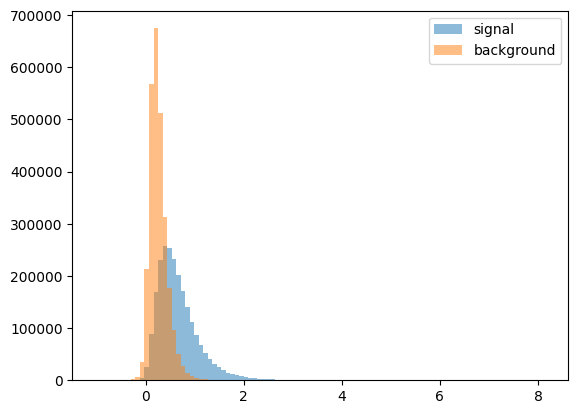

In [98]:
h_s,bins,_=plt.hist(output_sig,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_bac,bins=bins,alpha=0.5,label="background")
plt.legend()